In [ ]:
import glob
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

# Text preprocessing

In [ ]:
import numpy as np
import tensorflow as tf
import random
import json
import pickle
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

drive_path = '/content/drive/My Drive/diplom_data/'

def get_answer(tag):
  responses = ''
  add_info = ''
  for tg in data["intents"]:
    if tg['tag'] == tag:
      responses = tg['response']
      add_info = tg['add_info']
  response = random.choice(responses)
  return (response, add_info)


# from google drive
with open( drive_path + 'intents.json') as file:
  data = json.load(file)

intents = {
    'pattern': [],
    'label': []
}

labels = []
for intent in data["intents"]:
  for pattern in intent["patterns"]:
    intents['pattern'].append(pattern)
    intents['label'].append(intent["tag"])

    if intent["tag"] not in labels:
       labels.append(intent["tag"])

df = pd.DataFrame(list(zip(intents['pattern'], intents['label'])), columns=['text', 'label'])
print('Количество вопросов: ' + str(len(df['text'].values)))
print('Количество интентов: ' + str(len(pd.Series(labels, name='A').unique())))
df.head()

Количество вопросов: 287
Количество интентов: 51


,text,label
0,Привет,greeting
1,Есть кто-нибудь,greeting
2,Приветики,greeting
3,Ауу,greeting
4,Здравствуй,greeting


In [ ]:
texts = df['text'].values
labels = df['label'].values

with open("texts.txt", "w") as file:
  for text in texts:
    file.write(text + '\n')

# Accurancy test

In [ ]:
from sklearn.metrics import accuracy_score
def model_accurancy_clust(predict):
  y_true = []
  y_pred = []
  for label in df['label']:
    y_true.append(label)
  for text in df['text']:
    y_pred.append(labels[predict(vec.transform([text]))[0]])

  print('y_true = ', y_true)
  print('y_pred = ', y_pred)
  return accuracy_score(y_true, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
def model_accurancy(predict):
  y_true = []
  y_pred = []
  for label in df['label']:
    y_true.append(label)
  for text in df['text']:
    y_pred.append(predict(text))

  print('y_true = ', y_true)
  print('y_pred = ', y_pred)
  return accuracy_score(y_true, y_pred)

# Text clustering

In [ ]:
# for reproducibility
random_state = 0 
vec = TfidfVectorizer()
vec.fit(df.text.values)
features = vec.transform(df.text.values)
print("Count clust " + str(len(labels)))
cls = MiniBatchKMeans(n_clusters=len(labels), random_state=random_state)
cls.fit(features)
cls.predict(features)
cls.labels_

Count clust 38


array([27,  9, 15, 27, 36,  0,  0, 23, 15, 23, 14, 14, 17, 17, 28, 28, 32,
       37, 15, 30, 33,  8,  8, 24, 15, 35,  5, 15,  5,  5, 15,  2,  3,  2,
       31, 31, 15, 10, 10, 10, 10, 12, 12,  4, 20, 15, 20, 34,  2, 34, 34,
       34, 21, 12, 20, 20,  7,  7, 19, 19, 19,  2,  7,  2,  2,  7, 15, 24,
       12,  1, 12,  1, 20, 20,  6, 21, 13, 21, 25, 15, 25, 26, 26, 26, 11,
       11, 15, 11, 22, 22, 15, 18, 18, 18, 18,  0, 16, 13, 16,  2, 15, 29,
       29,  2, 15,  1, 21, 13,  1, 12,  1,  1, 12], dtype=int32)

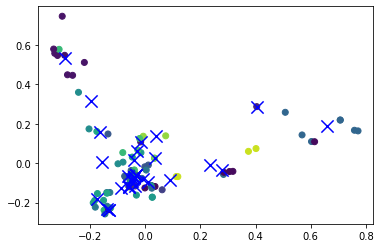

In [ ]:
#visualization
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [ ]:
#Оценка
# from sklearn.metrics import homogeneity_score
# homogeneity_score(df.label, cls.predict(features))

print(model_accurancy_clust(cls.predict))

y_true =  ['greeting', 'greeting', 'greeting', 'greeting', 'greeting_ques', 'greeting_ques', 'greeting_ques', 'thanks', 'thanks', 'thanks', 'greeting_day', 'greeting_day', 'greeting_morning', 'greeting_morning', 'greeting_evening', 'greeting_evening', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'age', 'age', 'age', 'name', 'name', 'name', 'what_can_you_do', 'what_can_you_do', 'what_can_you_do', 'what_can_you_do', 'general_info_address', 'general_info_address', 'general_info_address', 'general_info_address', 'general_info_website', 'general_info_website', 'general_info_lk', 'general_info_lk', 'general_info_lk', 'general_info_lk', 'general_info_lk', 'general_phone_num', 'general_phone_num', 'general_phone_num', 'general_email', 'general_email', 'general_email', 'select_commit_address', 'select_commit_address', 'select_commit_phone_num', 'select_commit_phone_num', 'select_commit_work', 'select_commit_work', 'kaf_phone_num', 'kaf_email', 'kaf_email', 'kaf_teachers', 'kaf_teachers', 'kaf_ch

In [ ]:
features = vec.transform(["Спасибо"])
result = cls.predict(features)[0]
print(labels[result])

fac_location


# Naive Bayes classifier

In [ ]:
def data_prepare():
    col = ['text', 'label']
    y = df
    y = y[col]
    y = y[pd.notnull(y['label'])]
    y.columns = ['text', 'label']
    y['category_id'] = y['text'].factorize()[0]
    category_id_df = y[['text', 'category_id']].drop_duplicates().sort_values('category_id')
    category_to_id = dict(category_id_df.values)
    id_to_category = dict(category_id_df[['category_id', 'text']].values)
    return y

print(data_prepare())

                                              text  ... category_id
0                                           Привет  ...           0
1                                  Есть кто-нибудь  ...           1
2                                        Приветики  ...           2
3                                              Ауу  ...           3
4                                        Как дела?  ...           4
..                                             ...  ...         ...
108          Время работы студенческой поликлиники  ...         106
109        Номер телефона студенческой поликлиники  ...         107
110               Телефон студенческой поликлиники  ...         108
111           Какой номер студенческой поликлиники  ...         109
112  Какой номер телефона студенческой поликлиники  ...         110

[113 rows x 3 columns]


In [ ]:

def naive_algo():
    tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2))
    df = data_prepare()
    features = tfidf.fit_transform(df.text).toarray()
    labels = df.category_id
    # print(features.shape)
    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state = 0)
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(X_train)
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

    clf = MultinomialNB(alpha = 0.1).fit(X_train_tfidf, y_train)
    return clf,count_vect


In [ ]:
def predict(question):
    clf, count_vect = naive_algo()
    intent = clf.predict(count_vect.transform([question]))
    intent = str(intent).strip("['']")
    print(clf.predict_proba(count_vect.transform([question])))
    # print(intent)
    return intent

In [ ]:
while True:
  ques = input("Enter your question ")
  if ques == 'q':
    break
  response_add_info = get_answer(predict(ques))
  print(response_add_info[0] + ' ' + response_add_info[1])

In [ ]:
model_accurancy(predict)

# SVM

In [ ]:
from sklearn.svm import SVC, LinearSVC# Support Vector Machine
from sklearn.pipeline import Pipeline #pipeline to implement steps in series
from gensim import parsing 

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2))
df = data_prepare()
features = tfidf.fit_transform(df.text).toarray()
labels = df.category_id
# print(features.shape)
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = LinearSVC()

#train model
clf.fit(X_train_tfidf, y_train)

def svm_predict(question): 
  return clf.predict(count_vect.transform([question]))[0]

# print(X_test)
# predicted = text_clf.predict(X_test)
# print(predicted)

In [ ]:
#predict class form test data 
while True:
  question = input("Enter your question ")
  if question == 'q':
    break
  response_add_info = get_answer(svm_predict(question))
  print(response_add_info[0] + ' ' + response_add_info[1])


Enter your question й
Пока 
Enter your question q


In [ ]:
model_accurancy(svm_predict)

y_true =  ['greeting', 'greeting', 'greeting', 'greeting', 'greeting_ques', 'greeting_ques', 'greeting_ques', 'thanks', 'thanks', 'thanks', 'greeting_day', 'greeting_day', 'greeting_morning', 'greeting_morning', 'greeting_evening', 'greeting_evening', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'age', 'age', 'age', 'name', 'name', 'name', 'what_can_you_do', 'what_can_you_do', 'what_can_you_do', 'what_can_you_do', 'general_info_address', 'general_info_address', 'general_info_address', 'general_info_address', 'general_info_website', 'general_info_website', 'general_info_lk', 'general_info_lk', 'general_info_lk', 'general_info_lk', 'general_info_lk', 'general_phone_num', 'general_phone_num', 'general_phone_num', 'general_email', 'general_email', 'general_email', 'select_commit_address', 'select_commit_address', 'select_commit_phone_num', 'select_commit_phone_num', 'select_commit_work', 'select_commit_work', 'kaf_phone_num', 'kaf_email', 'kaf_email', 'kaf_teachers', 'kaf_teachers', 'kaf_ch

0.8849557522123894

# Simple NN

https://www.tensorflow.org/tutorials/keras/text_classification_with_hub

https://www.tensorflow.org/tutorials/keras/text_classification

In [ ]:
import numpy as np
import tensorflow as tf

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")



Version:  2.4.0
Eager mode:  True
GPU is NOT AVAILABLE


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

texts = df['text'].values
labels = df['label'].values

maxlen = len(max(texts, key=len).split()) + 10
embedding_dim = 300

num_samples = pd.Series(labels, name='A').unique()

sentences_train, sentences_test, y_train, y_test = train_test_split(texts, labels, test_size=0.01, random_state=1000)
# print(sentences_train, y_train)

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(sentences_train)

encoder = LabelBinarizer()

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)


encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

vocab_size = len(tokenizer.word_index) + 1 


X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [ ]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dropout(0.3))
model.add(layers.Dense(num_samples.size, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 17, 300)           54600     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 80)                24080     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2592      
_________________________________________________________________
dense_7 (Dense)              (None, 39)                1287      
Total params: 82,559
Trainable params: 82,559
Non-trainable params: 0
_________________________________________________________________


https://www.tensorflow.org/guide/keras/save_and_serialize - сохранение модели

In [ ]:
history = model.fit(X_train, y_train, epochs=20, verbose=1,  batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
model.save(drive_path + 'saved_models/intent_classifier.h5')


In [ ]:
text_labels = encoder.classes_
while True:
  question = input("Вопрос >> ")
  if question == 'q' or question == 'й':
    break
  tok_question = tokenizer.texts_to_sequences([question])
  pad_question = pad_sequences(tok_question, padding='post', maxlen=maxlen)
  print(pad_question)
  response_add_info = model.predict(np.array(pad_question))
  print(text_labels[np.argmax(response_add_info[0])] + " >> " + str(np.argmax(response_add_info[0])))
  print(response_add_info[0])
  print(get_answer(text_labels[np.argmax(response_add_info[0])]))
  result_index = np.argmax(response_add_info[0])
  print("Result index = ", result_index)
  print('Predict % ', response_add_info[0][result_index])


# prediction = model.predict(np.array([x_t]))

# NN v.2 RNN(LTSM)

In [ ]:
import numpy as np
import tensorflow as tf

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.4.1
Eager mode:  True
GPU is NOT AVAILABLE


In [ ]:
!pip3 install navec
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
from navec import Navec
navec_path = 'navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(navec_path)

--2021-02-02 13:27:34--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53012480 (51M) [application/x-tar]
Saving to: ‘navec_hudlit_v1_12B_500K_300d_100q.tar’

navec_hudlit_v1_12B 100%[===================>]  50.56M  7.55MB/s    in 7.0s    

2021-02-02 13:27:42 (7.23 MB/s) - ‘navec_hudlit_v1_12B_500K_300d_100q.tar’ saved [53012480/53012480]



In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pickle
import json
import os


if not os.path.isdir('utils'):
  os.mkdir("utils")

max_num_words = 1000
embedding_dim = 300

texts = df['text'].values
labels = df['label'].values
train_txt, test_txt, train_label, test_labels = train_test_split(texts, labels, test_size = 0.01)

ls = []
for c in train_txt:
  ls.append(len(c.split()))
maxLen = int(np.percentile(ls, 98)) 
maxLen


7

In [ ]:
 test_txt

array(['Время работы приемной комиссии',
       'Скажи пожалуйста номер телефона кафедры', 'Привет'], dtype=object)

In [ ]:
classes = np.unique(labels)
tokenizer = Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(train_txt)

train_sequences = tokenizer.texts_to_sequences(train_txt)
train_sequences = pad_sequences(train_sequences, maxlen=maxLen, padding='post')
test_sequences = tokenizer.texts_to_sequences(test_txt)
test_sequences = pad_sequences(test_sequences, maxlen=maxLen, padding='post')
word_index = tokenizer.word_index
num_words = min(max_num_words, len(word_index)) + 1

In [ ]:
def embedding_matrix_creater(embedding_dimention, word_index):
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dimention))
    for word, i in word_index.items():
        embedding_vector = navec.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix
    
embedding_matrix = embedding_matrix_creater(embedding_dim, word_index=word_index)

In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(classes)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoder.fit(integer_encoded)

train_label_encoded = label_encoder.transform(train_label)
train_label_encoded = train_label_encoded.reshape(len(train_label_encoded), 1)
train_label = onehot_encoder.transform(train_label_encoded)

test_labels_encoded = label_encoder.transform(test_labels)
test_labels_encoded = test_labels_encoded.reshape(len(test_labels_encoded), 1)
test_labels = onehot_encoder.transform(test_labels_encoded)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, LSTM, Activation, Bidirectional,Embedding

model = Sequential()

model.add(Embedding(num_words, 300, trainable=False, input_length=train_sequences.shape[1], weights=[embedding_matrix]))
model.add(Bidirectional(LSTM(256, return_sequences=True, recurrent_dropout=0.1, dropout=0.1), 'concat'))
# model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=False, recurrent_dropout=0.1, dropout=0.1))
# model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(classes.shape[0], activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 7, 300)            75900     
_________________________________________________________________
bidirectional (Bidirectional (None, 7, 512)            1140736   
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 50)                12850     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 51)                2601      
Total params: 2,019,543
Trainable params: 1,943,643
Non-trainable params: 75,900
_________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])

In [ ]:
history = model.fit(train_sequences, train_label, epochs=20,
          batch_size=10, shuffle=True,
          validation_data=[test_sequences, test_labels])

Epoch 1/20
29/29 [==============================] - 13s 208ms/step - loss: 3.8840 - acc: 0.0354 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 2/20
29/29 [==============================] - 5s 180ms/step - loss: 3.3460 - acc: 0.1359 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 3/20
29/29 [==============================] - 5s 171ms/step - loss: 2.4261 - acc: 0.3437 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 4/20
29/29 [==============================] - 5s 172ms/step - loss: 2.0010 - acc: 0.4974 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 5/20
29/29 [==============================] - 5s 171ms/step - loss: 1.1658 - acc: 0.6634 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 6/20
29/29 [==============================] - 5s 169ms/step - loss: 0.7770 - acc: 0.7724 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 7/20
29/29 [==============================] - 5s 170ms/step - loss: 0.6976 - acc: 0.7904 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 8/20
29/29 [=

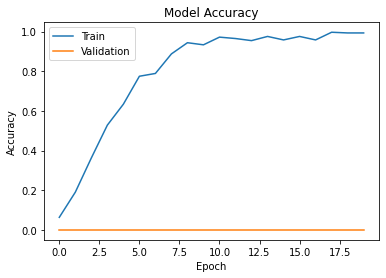

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

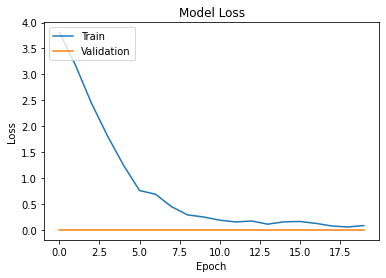

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save(drive_path + 'int_cl/intents.h5')

with open(drive_path + 'int_cl/classes.pkl', 'wb') as file:
   pickle.dump(classes, file)

with open(drive_path + 'int_cl/tokenizer.pkl', 'wb') as file:
   pickle.dump(tokenizer, file)

with open(drive_path + 'int_cl/label_encoder.pkl', 'wb') as file:
   pickle.dump(label_encoder, file)

In [ ]:
class IntentClassifier:
    def __init__(self, classes, model, tokenizer, label_encoder):
        self.classes = classes
        self.classifier = model
        self.tokenizer = tokenizer
        self.label_encoder = label_encoder

    def get_intent(self, text):
        self.text = [text]
        self.test_keras = self.tokenizer.texts_to_sequences(self.text)
        self.test_keras_sequence = pad_sequences(self.test_keras, maxlen=7, padding='post')
        self.pred = self.classifier.predict(self.test_keras_sequence)
        print(self.pred[0])
        result_index = np.argmax(self.pred,1)
        print(self.pred[0][result_index])
        return label_encoder.inverse_transform(np.argmax(self.pred,1))[0]

    def get_intent_witout_print(self, text):
        self.text = [text]
        self.test_keras = self.tokenizer.texts_to_sequences(self.text)
        self.test_keras_sequence = pad_sequences(self.test_keras, maxlen=7, padding='post')
        self.pred = self.classifier.predict(self.test_keras_sequence)
        result_index = np.argmax(self.pred,1)
        return (label_encoder.inverse_transform(np.argmax(self.pred,1))[0], self.pred[0][result_index])

In [ ]:
import pickle

from keras.models import load_model

model = load_model(drive_path + 'int_cl/intents.h5')

with open(drive_path + 'int_cl/classes.pkl', 'rb') as file:
  classes = pickle.load(file)

with open(drive_path + 'int_cl/tokenizer.pkl', 'rb') as file:
  tokenizer = pickle.load(file)

with open(drive_path + 'int_cl/label_encoder.pkl', 'rb') as file:
  label_encoder = pickle.load(file)

In [ ]:
nlu = IntentClassifier(classes, model, tokenizer, label_encoder)

In [ ]:
q = ''
while True:
  q = str(input())
  if q == 'q' or q == 'й':
    break;
  predicted_tag = nlu.get_intent(q)
  print('intent name >> ' + predicted_tag)
  response_add_info = get_answer(predicted_tag)
  print(response_add_info[0] + ' ' + response_add_info[1])

й


In [ ]:
nlu.get_intent("Спасибо большое")

[2.13441070e-11 8.08287326e-10 1.01771427e-08 8.83760265e-09
 1.13216026e-06 8.21903683e-08 1.03482935e-05 2.96491066e-07
 2.64121411e-07 2.31439348e-08 2.29648234e-09 4.70529482e-09
 1.16154297e-09 5.47975515e-06 4.10804296e-06 2.71410263e-05
 5.07130692e-11 2.90630246e-11 6.68488482e-08 1.94704683e-07
 1.59312713e-05 9.12445466e-05 3.25101755e-05 1.21514495e-06
 9.27541155e-09 2.03037033e-07 1.68022893e-07 1.58562563e-09
 1.97939897e-07 1.04155795e-09 7.13818726e-10 9.30335670e-12
 8.49776285e-08 1.73986783e-10 2.47217795e-05 2.69557913e-05
 4.05129041e-10 7.75816389e-09 2.27644747e-09 5.81175470e-07
 8.00952016e-09 3.95264273e-11 1.15736554e-09 7.27499572e-09
 4.77127031e-08 7.38695718e-08 1.36890250e-07 9.99752343e-01
 2.92401459e-09 4.32806019e-06 4.57277861e-11]
[0.99975234]


'thanks'

In [ ]:
import random
def testModel():
  questions = df['text'].values
  tags = df['label'].values
  test_data = []
  for idx, val in enumerate(questions):
    test_data.append((val, labels[idx]))
  test_data = random.sample(test_data, len(test_data))
  with open("testResult.txt", "w") as file:
    file.write('TEXT \t TAG \t\t PREDICTED TAG \t RESPONSE \t SCORE')
    for data in test_data:
      result = nlu.get_intent_witout_print(data[0])
      response_add_info = get_answer(result[0])
      file.write(str(data[0]) + '\t' + data[1] + '\t\t' + str(result[0]) + '\t' + str(response_add_info[0]) + ' ' + str(response_add_info[1]) + '\t' + str(result[1]) + '\n')

testModel()

# Work-=-

In [ ]:
group = 'ЗУ-540'
facult = 'МРИПК'

with open("user4.csv", "r") as f:
  for i, line in enumerate(f):
    lastname, firstname, login = line.split(',')
    fin_str = login.rstrip() + '@esstu.onmicrosoft.com,' + firstname + ',' + lastname + ',' + firstname + ' ' + lastname + ' ' + group + ',Студент,' + facult + ',,,,,,,улан-удэ,,670000,Россия'
    print(fin_str)